In [1]:
import numpy as np
import matplotlib.pyplot as plt
import itertools
import matplotlib.ticker as ticker

In [2]:
filenames = [
    "losses/losses_0-22.npy",
    "losses/losses_22-44.npy",
    "losses/losses_44-66.npy",
    "losses/losses_66-88.npy",
    "losses/losses_88-110.npy",
]

losses = np.asarray([])

for fn in filenames:

    print(fn)

    loss_dict = np.load(fn, allow_pickle=True)
    loss = np.array(list(itertools.chain(*[loss_dict[i]["loss"] for i in range(len(loss_dict))])))

    losses = np.append(losses, loss)

losses/losses_0-22.npy
losses/losses_22-44.npy
losses/losses_44-66.npy
losses/losses_66-88.npy
losses/losses_88-110.npy


In [3]:
losses = losses[30:100000]

In [4]:
losses.shape

(99970,)

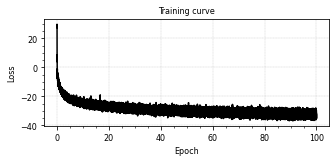

In [5]:
# FuncFormatter can be used as a decorator
@ticker.FuncFormatter
def major_formatter(x, pos):
    return f"{int(x/1000)}"

with plt.style.context("losses/latex_document.mplstyle"):

    fig = plt.figure(figsize=(4.7747, 0.8*2.9509))
    plt.plot(losses, color="black")

    plt.title("Training curve")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")

    plt.gca().xaxis.set_major_formatter(major_formatter)

    plt.grid()
    plt.savefig("losses/training_curve.pdf")

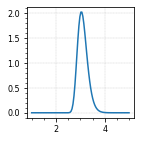

In [6]:
# Plot small log normal
from scipy.stats import lognorm as lgn
with plt.style.context("losses/latex_document.mplstyle"):

    fig = plt.figure(figsize=(2, 2))

    x_space = np.linspace(1, 5, 100)
    y = lgn.pdf(x_space, 0.2, np.log(8))


    plt.plot(x_space, y)
    plt.grid()
    plt.show()